## Is R-squared Useless?

- https://www.stat.cmu.edu/%7Ecshalizi/mreg/15/lectures/10/lecture-10.pdf
- https://library.virginia.edu/data/articles/is-r-squared-useless
- https://www.investopedia.com/terms/r/r-squared.asp
- 

In [1]:
import os,sys, time, math, warnings
import numpy as np
import pandas as pd
import sklearn
from scipy.stats import linregress
import matplotlib
import matplotlib.pyplot as plt

In [2]:
print('python',sys.version.split()[0])
print('np',np.__version__)
print('pd',pd.__version__)
print('sklearn',sklearn.__version__)
print('matplotlib',matplotlib.__version__)

python 3.11.5
np 1.24.2
pd 2.0.0
sklearn 1.3.2
matplotlib 3.7.1


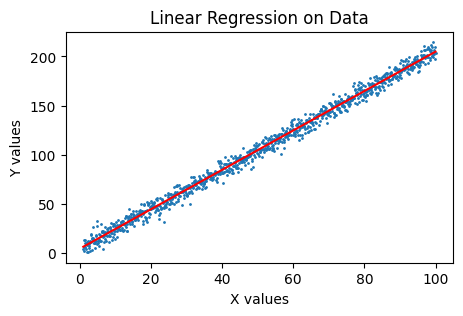

sse       =     26.598
r_squared =      0.992


In [3]:
# Simple Linea Data

# x[] array: 1000 values between 1 and 100
x = np.linspace(1, 100, 1000)

# y[] array as linear function plus noise
slope, intercept = 2, 5
sigma = 5 
y = slope * x + intercept + np.random.normal(0, sigma, x.size)

# Step 3: Calculate linear regression
regression = linregress(x, y)
y_pred = regression.slope * x + regression.intercept

# Step 4: Draw the plot and print the metrics
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=1)
plt.plot(x, y_pred, color='red')
plt.title('Linear Regression on Data')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

# Print out error metrics
residuals = y - y_pred
sse = np.sum(residuals**2)/len(residuals)  # Sum of squared errors
r_squared = regression.rvalue**2  # Coefficient of determination

print(f"sse       = {sse:10.3f}")
print(f"r_squared = {r_squared:10.3f}")

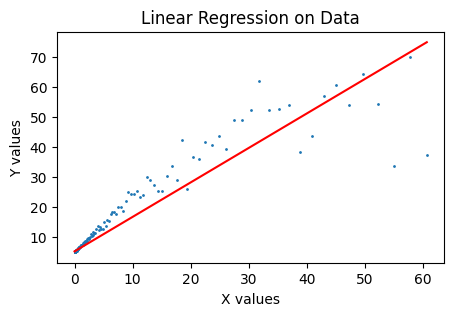

sse       =      5.758
r_squared =      0.895


In [4]:
# Data grouped on the left, added non-linearity

# Step 1: Generate array x with values between 1 and 100, more densely distributed on the left
x = np.linspace(1, 100, 1000)
x = np.sort(100 * np.exp(-x/2))

# Step 2: Generate array y derived from x 
# as a linear function with Gaussian noise and non-linearity
slope, intercept = 2, 5  # Example linear function coefficients
sigma = 0.2*x  # Gaussian noise standard deviation
y = slope * x + intercept + np.random.normal(0, sigma, x.size) - 0.02*x*x

# Step 3: Calculate linear regression
regression = linregress(x, y)
y_pred = regression.slope * x + regression.intercept

# Step 4: Draw the plot and print the metrics
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=1)
plt.plot(x, y_pred, color='red')
plt.title('Linear Regression on Data')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

# Print out error metrics
residuals = y - y_pred
sse = np.sum(residuals**2)/len(residuals)  # Sum of squared errors
r_squared = regression.rvalue**2  # Coefficient of determination

print(f"sse       = {sse:10.3f}")
print(f"r_squared = {r_squared:10.3f}")